Insert Data

In [2]:
import pandas as pd
dataset = pd.read_csv('drive/MyDrive/dataset/song_data.csv')
dataset.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


Describe Data

In [3]:
dataset.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


Explore Data

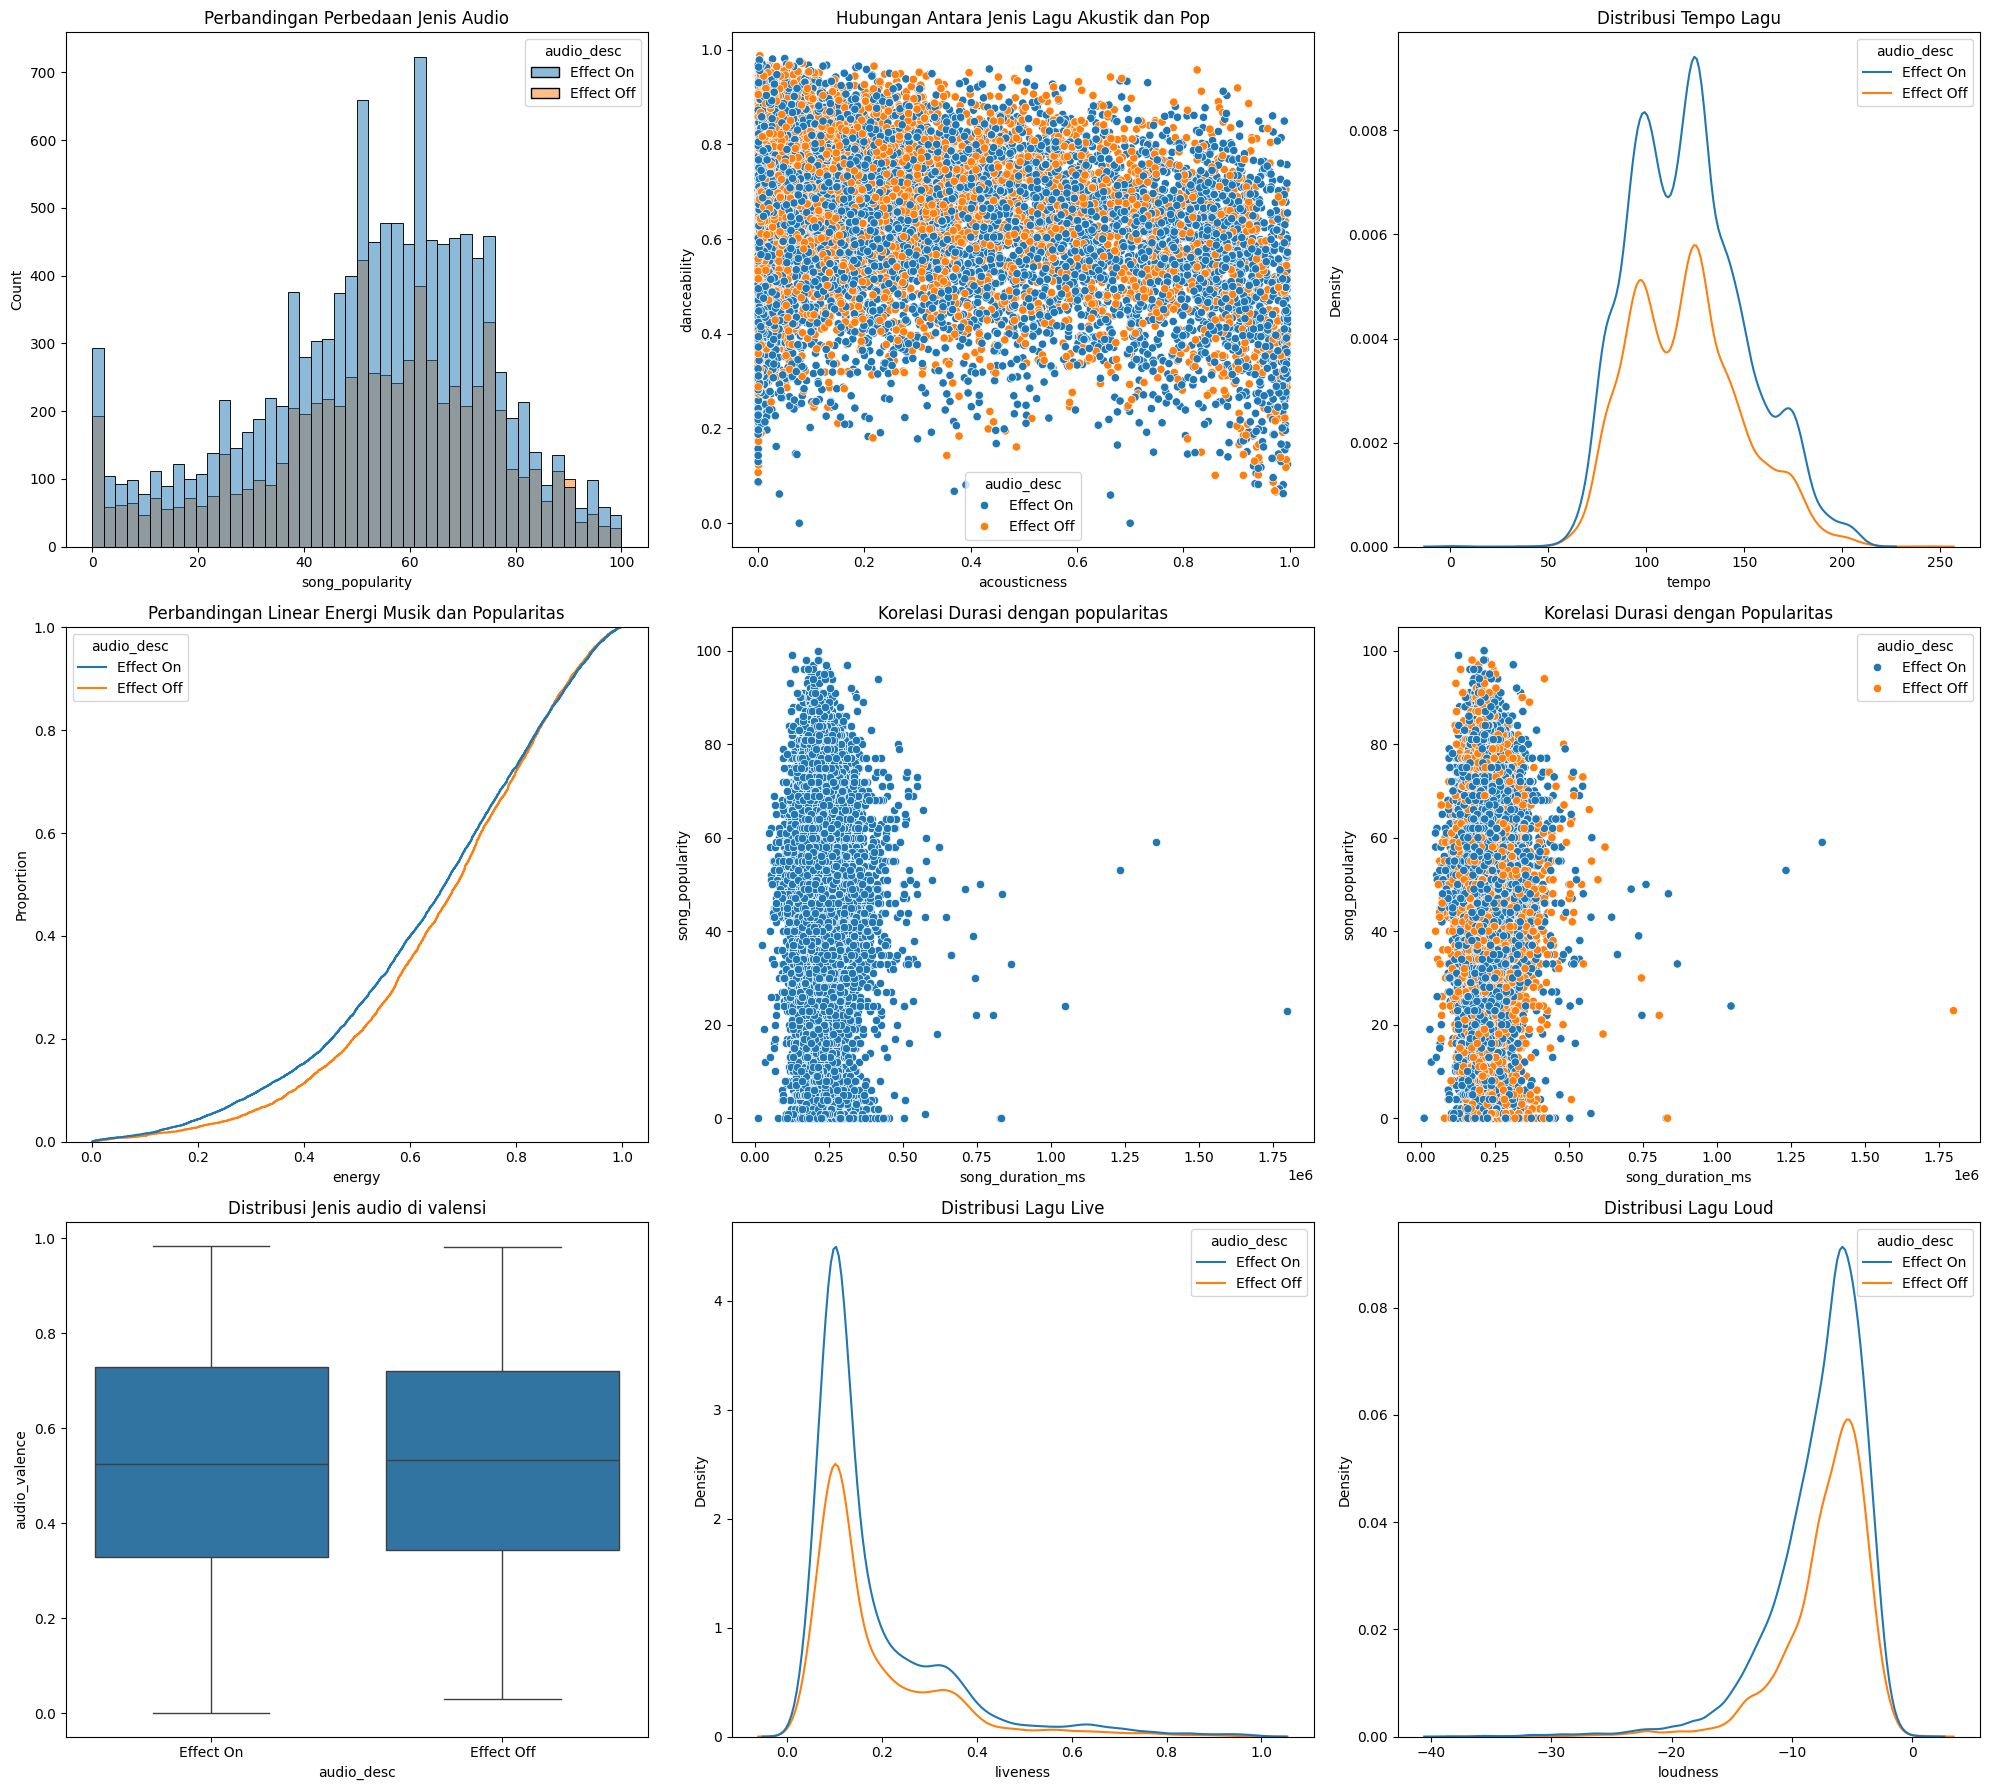

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import numpy as np

dataset['audio_desc'] = np.where(dataset['audio_mode']==1, 'Effect On', 'Effect Off')
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,18))

sbs.histplot(dataset, x="song_popularity", hue="audio_desc", ax=axs[0,0])
axs[0,0].set_title('Perbandingan Perbedaan Jenis Audio')

sbs.scatterplot(dataset, x='acousticness', y='danceability', hue='audio_desc', ax=axs[0,1])
axs[0,1].set_title('Hubungan Antara Jenis Lagu Akustik dan Pop')

sbs.kdeplot(dataset, x="tempo", hue='audio_desc', ax=axs[0,2])
axs[0,2].set_title('Distribusi Tempo Lagu')

sbs.ecdfplot(dataset, x='energy', hue='audio_desc', ax=axs[1,0])
axs[1,0].set_title('Perbandingan Linear Energi Musik dan Popularitas')

sbs.scatterplot(data=dataset, x='song_duration_ms', y='song_popularity',  ax=axs[1,1])
axs[1,1].set_title('Korelasi Durasi dengan popularitas')

sbs.scatterplot(data=dataset, x='song_duration_ms', y='song_popularity', hue='audio_desc', ax=axs[1,2])
axs[1,2].set_title('Korelasi Durasi dengan Popularitas')

sbs.boxplot(dataset, x='audio_desc', y='audio_valence', ax=axs[2,0])
axs[2,0].set_title('Distribusi Jenis audio di valensi')

sbs.kdeplot(dataset, x="liveness", hue='audio_desc', ax=axs[2,1])
axs[2,1].set_title('Distribusi Lagu Live')

sbs.kdeplot(dataset, x="loudness", hue='audio_desc', ax=axs[2,2])
axs[2,2].set_title('Distribusi Lagu Loud')

plt.tight_layout()
plt.show()


Cleaning Data

In [4]:
import pandas as pd
import numpy as np

dataset.isnull().sum()

,0
song_name,0
song_popularity,0
song_duration_ms,0
acousticness,0
danceability,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0


Split Train Test

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

X = dataset.drop(columns={'song_popularity','song_name', 'audio_desc', 'key', 'liveness', 'speechiness','tempo'})
y = dataset['song_popularity']

X_test, X_train, y_test, y_train = train_test_split(X,y,test_size=0.1, random_state=42)


Modelling ~Lasso Regression

In [11]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_model = LassoCV(cv=5,random_state=42)
lasso_model.fit(X_train_scaled, y_train)

y_pred = lasso_model.predict(X_test_scaled)

alpha = lasso_model.alpha_
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_square_score = r2_score(y_test, y_pred)
eval_lasso = pd.DataFrame(
    {
     'Algoritma': 'Lasso Regression',
     'MAE': [mse],
     'MSE': [mae],
     'R2': [r_square_score],
    }
    )

print("Best Alpha : ", alpha)
print("Best Koefisien: ", lasso_model.coef_)
print("MSE :", mse)
print("MAE : ", mae)
print("R2_Square : ", r_square_score)

Best Alpha :  0.0026067469938352685
Best Koefisien:  [ 0.30288283 -1.25983622  1.12209545 -3.15327646 -2.02559896  2.97395948
  0.87309904  0.29064706 -1.54205682]
MSE : 461.010382762237
MAE :  17.079055031419
R2_Square :  0.04139891993142242


Visualisasi Error per CV

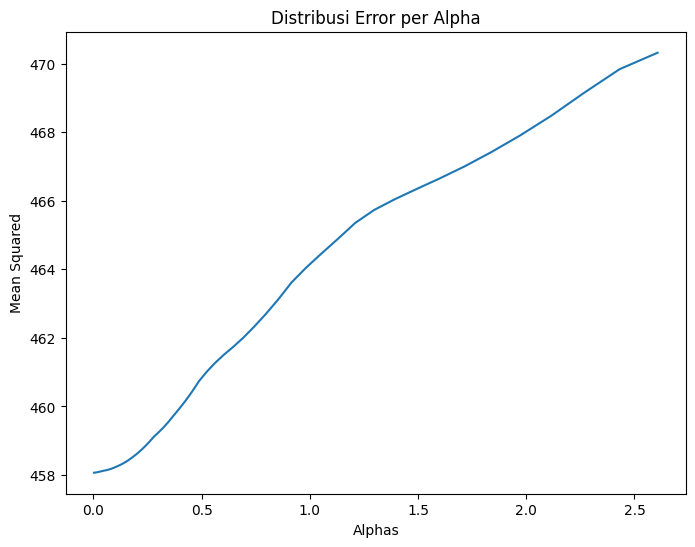

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
alphas = lasso_model.alphas_
mse_path = lasso_model.mse_path_
mean_mse = np.mean(mse_path, axis=1)
plt.figure(figsize=(8,6))
plt.plot(alphas, mean_mse)
plt.xlabel('Alphas')
plt.ylabel('Mean Squared')
plt.title('Distribusi Error per Alpha')
plt.show()

Modelling -OLS

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
regresi = LinearRegression()
regresi.fit(X_train, y_train)

y_pred = regresi.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_square_score = r2_score(y_test, y_pred)

eval_ols = pd.DataFrame(
    {
     'Algoritma': 'Ordinary Least Square',
     'MAE': [mse],
     'MSE': [mae],
     'R2': [r_square_score],
    }
)

print('MSE: ', mse)
print('MAE: ', mae)
print('R2 Score', r_square_score)

MSE:  461.01125055343584
MAE:  17.07900400449534
R2 Score 0.04139711549141056


Random Forest Regression

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(random_state=42)
params = {
    'n_estimators': [None,100,200,300],
    'max_depth': [None, 10,12,15],
    'min_samples_leaf': [None,3,4,5],
    'min_samples_split': [None,3,4,5]
}
gridcv = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2,
)

gridcv.fit(X_train, y_train)

best_param = gridcv.best_estimator_
print(best_param)

y_pred1 = best_param.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
r_square_score = r2_score(y_test, y_pred1)
eval_random_f = pd.DataFrame(
    {
     'Algoritma': 'Random Forest Regression',
     'MAE': [mse],
     'MSE': [mae],
     'R2': [r_square_score],
    }
)
print('MSE: ', mse)
print('MAE: ', mae)
print('R2 Score', r_square_score)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
740 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

RandomForestRegressor(min_samples_leaf=3, min_samples_split=3, n_estimators=200,
                      random_state=42)
MSE:  412.65075369537317
MAE:  15.999592305961341
R2 Score 0.1419554244887613


In [23]:
eval_random_f

,Algoritma,MAE,MSE,R2
0,Random Forest Regression,412.650754,15.999592,0.141955


Model Gradient Boost

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
import pandas as pd

model = GradientBoostingRegressor(loss='absolute_error', random_state=42)
param_all = {
    'learning_rate': uniform(0,1),
    'n_estimators': randint(50,300),
    'subsample': uniform(0.001,0.5),
    'min_samples_split': randint(2,7),
    'min_samples_leaf': randint(1,5),
    'max_depth': randint(2,15),
}
model = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_all,
    n_iter=150,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=5,
    verbose=2
)
model.fit(X_train,y_train)

cv_res = pd.DataFrame(model.cv_results_)
best_param = model.best_estimator_
print(best_param)

y_pred1 = best_param.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
r_square_score = r2_score(y_test, y_pred1)
eval_gr_b = pd.DataFrame(
    {
     'Algoritma': 'Gradient Boost Regressor',
     'MAE': [mse],
     'MSE': [mae],
     'R2': [r_square_score],
    }
)
print('MSE: ', mse)
print('MAE: ', mae)
print('R2 Score', r_square_score)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
GradientBoostingRegressor(learning_rate=np.float64(0.005624075496073466),
                          loss='absolute_error', max_depth=6,
                          min_samples_leaf=2, min_samples_split=6,
                          n_estimators=267, random_state=42,
                          subsample=np.float64(0.14340437770515035))
MSE:  445.3985839811127
MAE:  16.55964270695192
R2 Score 0.07386128462640007


In [18]:
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.089960,0.514101,0.016149,0.006019,0.817106,9,2,2,261,0.491146,"{'learning_rate': 0.8171062423357408, 'max_dep...",-3.397720e+01,-3.346008e+01,-2.857972e+01,-3.247916e+01,-3.312039e+01,-3.232331e+01,1.933996e+00,85
1,2.464357,0.480458,0.006584,0.000201,0.536432,4,1,2,227,0.422131,"{'learning_rate': 0.5364316005141937, 'max_dep...",-2.142770e+01,-2.106531e+01,-1.914509e+01,-2.044130e+01,-2.192196e+01,-2.080027e+01,9.581851e-01,47
2,4.281353,0.699523,0.009613,0.001056,0.863868,12,1,4,182,0.168582,"{'learning_rate': 0.8638682096326573, 'max_dep...",-2.115279e+07,-6.334038e+06,-1.507361e+07,-1.614076e+07,-1.378684e+07,-1.449761e+07,4.784813e+06,141
3,2.197745,0.374748,0.008452,0.000068,0.997438,7,1,5,243,0.069452,"{'learning_rate': 0.9974378855047655, 'max_dep...",-1.658046e+14,-3.208401e+13,-1.228838e+14,-8.540849e+13,-2.045156e+14,-1.221393e+14,6.025309e+13,150
4,2.765383,0.520331,0.008530,0.002377,0.565744,5,2,5,203,0.439677,"{'learning_rate': 0.565744013836478, 'max_dept...",-2.297196e+01,-2.163051e+01,-2.118622e+01,-2.081224e+01,-2.413998e+01,-2.214818e+01,1.234828e+00,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.509096,0.594808,0.013265,0.004453,0.220294,13,3,2,193,0.300964,"{'learning_rate': 0.22029419815790618, 'max_de...",-1.824663e+01,-1.925891e+01,-1.834094e+01,-1.911363e+01,-1.925798e+01,-1.884362e+01,4.530240e-01,30
146,1.210664,0.012252,0.007116,0.000171,0.046818,6,2,6,198,0.050714,"{'learning_rate': 0.04681820720459595, 'max_de...",-1.831168e+01,-1.836900e+01,-1.718336e+01,-1.708499e+01,-1.866764e+01,-1.792333e+01,6.563220e-01,17
147,3.622893,0.577792,0.006562,0.000178,0.249953,8,4,3,132,0.450918,"{'learning_rate': 0.24995298989416814, 'max_de...",-1.840368e+01,-1.839649e+01,-1.743295e+01,-1.821696e+01,-1.981520e+01,-1.845306e+01,7.690809e-01,22
148,1.834214,0.017686,0.005948,0.000169,0.064828,5,2,2,161,0.401133,"{'learning_rate': 0.06482824824143607, 'max_de...",-1.705409e+01,-1.704359e+01,-1.544559e+01,-1.564393e+01,-1.776167e+01,-1.658977e+01,8.942760e-01,5


Evaluasi Model

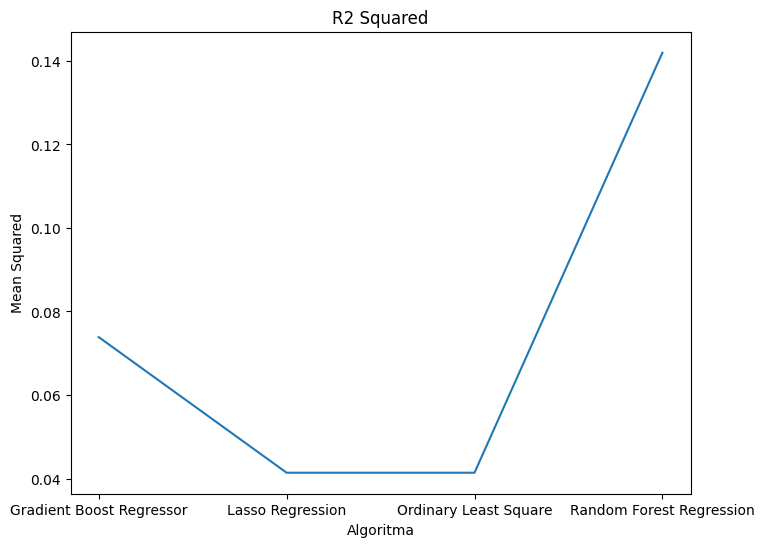

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
eval_all = pd.DataFrame(pd.concat([eval_gr_b,eval_lasso,eval_ols,eval_random_f], axis=0, ignore_index=True))

plt.figure(figsize=(8,6))
plt.plot(eval_all['Algoritma'], eval_all['R2'])
plt.xlabel('Algoritma')
plt.ylabel('Mean Squared')
plt.title('R2 Squared')
plt.show()

Next Coba Algoritma yang lebih kompleks

In [28]:
eval_all.to_csv('Regression Part 1', index=False)
